<a href="https://colab.research.google.com/github/JAMESCUDERO/Marathon/blob/main/modelo%20fina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving MarathonData.csv to MarathonData.csv


In [24]:
df = pd.read_csv('MarathonData.csv')

In [36]:
df.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1.0,132.8,14.434783,NaN,1.16,2.37
1,1.0,68.6,13.674419,NaN,1.23,2.59
2,1.0,82.7,13.520436,NaN,1.30,2.66
3,45.0,137.5,12.258544,NaN,1.32,2.68
4,1.0,84.6,13.945055,NaN,1.36,2.74


In [25]:
df = df.drop(columns=['id'])

In [26]:
df = df.drop(columns = ['Name'])
df = df.drop(columns=['CATEGORY'])
df = df.drop(columns=['Marathon'])

In [27]:
df['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', nan, 'WAM'], dtype=object)

In [28]:
val_cal = {'Category': {'MAM':1, 'M45':45, 'M40':40, 'M50':50, 'M55':55, 'WAM':2}}

In [29]:
val_cal

{'Category': {'MAM': 1, 'M45': 45, 'M40': 40, 'M50': 50, 'M55': 55, 'WAM': 2}}

In [30]:
df.replace(val_cal, inplace = True)

In [37]:
df['CrossTraining'].unique()

array([nan,  1.,  4., 13.,  5.,  3.])

In [34]:
va_cross = {'CrossTraining': {'ciclista 1h':1, 'ciclista 4h':4, 'ciclista 13h':13, 'ciclista 5h':5,
       'ciclista 3h':3}}

In [35]:
df.replace(va_cross,inplace= True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     float64
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     float64
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(6)
memory usage: 4.4 KB


In [39]:
df['Wall21'] = pd.to_numeric(df['Wall21'],errors='coerce')

In [54]:
df.isna().sum()

Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

In [50]:
df['CrossTraining'].unique()

array([nan,  1.,  4., 13.,  5.,  3.])

In [51]:
df['CrossTraining'] = df['CrossTraining'].fillna(0)

In [53]:
df = df.dropna(how='any')

In [60]:
import matplotlib.pyplot as plt

In [66]:
df = df.query('sp4week<1000')

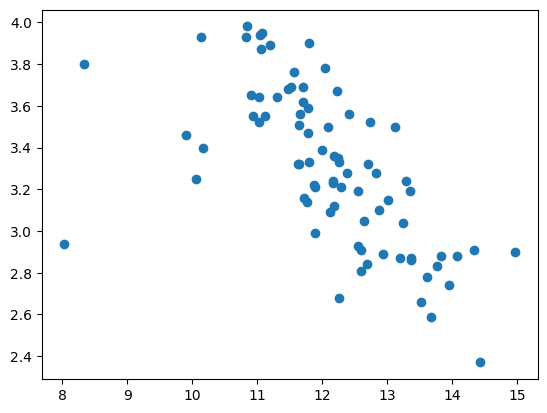

In [67]:
plt.scatter(x=df['sp4week'], y=df['MarathonTime'])

array([[<Axes: title={'center': 'Category'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'CrossTraining'}>],
       [<Axes: title={'center': 'Wall21'}>,
        <Axes: title={'center': 'MarathonTime'}>]], dtype=object)

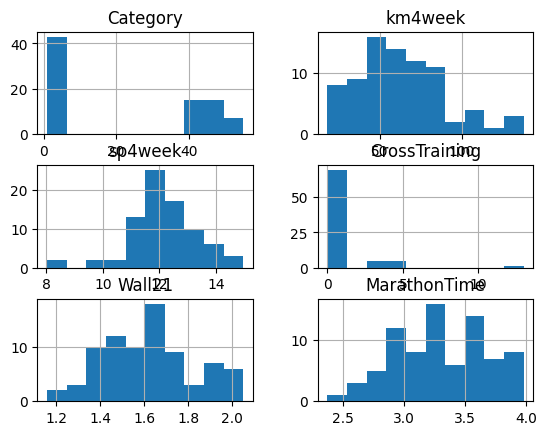

In [68]:
df.hist()

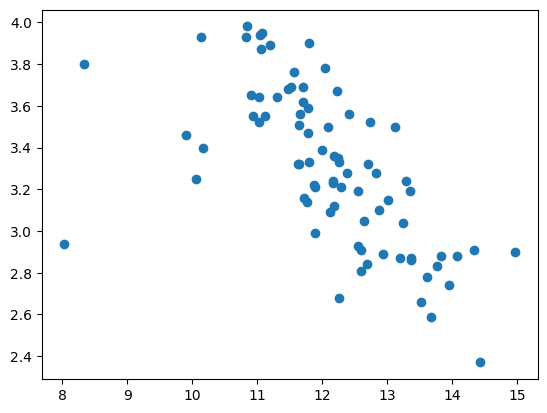

In [74]:
plt.scatter(x=df['sp4week'], y=df['MarathonTime'])

array([[<Axes: title={'center': 'MarathonTime'}>]], dtype=object)

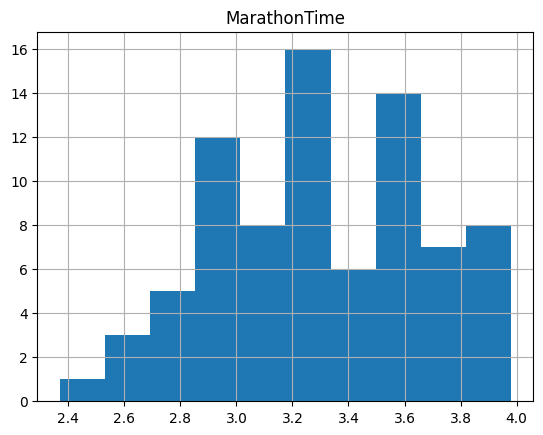

In [70]:
df.hist(['MarathonTime'])

In [75]:
d_train = df.sample(frac=0.80)

In [76]:
d_train

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
4,1.0,84.6,13.945055,0.0,1.36,2.74
54,40.0,70.7,11.783333,0.0,1.77,3.47
47,45.0,39.6,12.247423,0.0,1.67,3.35
71,50.0,24.2,11.523810,3.0,1.76,3.69
76,1.0,40.3,8.337931,5.0,1.94,3.80
...,...,...,...,...,...,...
83,40.0,33.6,10.130653,3.0,1.94,3.93
45,1.0,68.0,11.791908,0.0,1.67,3.33
49,1.0,78.2,12.000000,0.0,1.64,3.39
40,45.0,61.3,12.383838,0.0,1.59,3.28


In [79]:
d_test = df.drop(d_train.index)

In [80]:
d_test

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
7,45.0,106.0,12.694611,0.0,1.41,2.84
11,50.0,65.7,13.362712,0.0,1.40,2.87
12,45.0,53.5,14.078947,4.0,1.37,2.88
13,40.0,84.4,13.836066,0.0,1.41,2.88
28,45.0,51.6,13.008403,0.0,1.50,3.15
36,1.0,50.1,12.170040,0.0,1.56,3.23
39,2.0,69.2,10.053269,0.0,1.60,3.25
41,55.0,58.8,12.829091,0.0,1.68,3.28
43,1.0,32.2,12.710526,0.0,1.62,3.32
56,1.0,56.2,12.086022,0.0,1.71,3.50


In [81]:
result_train = d_train.pop('MarathonTime')

In [ ]:
r_train = result

In [84]:
result_test = d_test.pop('MarathonTime')

In [85]:
result_train

4     2.74
54    3.47
47    3.35
71    3.69
76    3.80
      ... 
83    3.93
45    3.33
49    3.39
40    3.28
31    3.19
Name: MarathonTime, Length: 64, dtype: float64

In [86]:
d_train

,Category,km4week,sp4week,CrossTraining,Wall21
4,1.0,84.6,13.945055,0.0,1.36
54,40.0,70.7,11.783333,0.0,1.77
47,45.0,39.6,12.247423,0.0,1.67
71,50.0,24.2,11.523810,3.0,1.76
76,1.0,40.3,8.337931,5.0,1.94
...,...,...,...,...,...
83,40.0,33.6,10.130653,3.0,1.94
45,1.0,68.0,11.791908,0.0,1.67
49,1.0,78.2,12.000000,0.0,1.64
40,45.0,61.3,12.383838,0.0,1.59


In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()

In [89]:
model.fit(d_train, result_train)

LinearRegression()

In [91]:
predicciones = model.predict(d_test)
predicciones

array([2.9027187 , 2.93270613, 2.85575074, 2.90249596, 3.11627641,
       3.20000321, 3.28769881, 3.40324447, 3.30789616, 3.4310242 ,
       3.40635652, 3.41011372, 3.52894056, 3.86919458, 4.06155274,
       4.05269781])

In [92]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(result_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 8.276315


In [93]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,20,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [95]:
model.predict(nuevo_corredor)

array([2.25287638])